In [2]:
import numpy as np
from pytz import timezone
from datetime import datetime
import matplotlib.pyplot as plt

TZ = timezone('Europe/Moscow')

In [3]:
from env_simple_move import HumanMoveSimpleAction


env = HumanMoveSimpleAction(render_mode = 'human', 
                            continuous=True, 
                            target_point_rand=False
                            )
seed = int( datetime.now(TZ).strftime("%H%M%S") )
print(seed)
env.action_space.seed(seed)

total_reward = 0.
step_reward = []
angle_step_reward = []
speed_step_reward = []
view_step_reward = []
stoper_step_reward = []


#env.set_options( options={'finish_dist':100,'start_dist':110,'delta_phi':0} )

observation, info = env.reset(seed=seed)
# course move, speed


for tick in range(1800):

    action = env.teach_action()
    #action = np.array([1,0.2,0.])
    #if tick > 100:
    #    action = env.teach_action()

    #action = 4
    #if observation[3] < 0.5:
    #    action = 1
    #else:
    #    action = 2

    observation, reward, terminated, truncated, info = env.step(action)

    if terminated or truncated:
        observation, info = env.reset()
        step_reward.append(reward)
        total_reward += reward
        print('BREAK', tick, terminated, truncated)
        break
    
    step_reward.append(reward)
    total_reward += reward

    rews = env.get_rewards()
    angle_step_reward.append(rews['angle_reward'])
    speed_step_reward.append(rews['speed_reward'])
    view_step_reward.append(rews['view_reward'] )
    stoper_step_reward.append(rews['stoped_reward'])

print(len(step_reward))
print(total_reward)

211029
BREAK 625 True False
626
7.771995271501325


In [3]:
step_reward

[{'angle_reward': 2.5518143925176595e-05,
  'speed_reward': 0.001,
  'view_reward': 0.0003322043858252574,
  'stoped_reward': 0.0},
 {'angle_reward': 6.611310955479154e-05,
  'speed_reward': 0.001,
  'view_reward': -7.333681528329142e-05,
  'stoped_reward': 0.0},
 {'angle_reward': 0.00012152865027487714,
  'speed_reward': 0.001,
  'view_reward': 0.0015212690807104305,
  'stoped_reward': 0.0},
 {'angle_reward': 0.0001965461668117161,
  'speed_reward': 0.001,
  'view_reward': 0.0013230430180024423,
  'stoped_reward': 0.0},
 {'angle_reward': 0.00029114273375114853,
  'speed_reward': 0.001,
  'view_reward': 0.0013001553884880199,
  'stoped_reward': 0.0},
 {'angle_reward': 0.0003941091421119314,
  'speed_reward': 0.001,
  'view_reward': 0.0013003186276396438,
  'stoped_reward': 0.0},
 {'angle_reward': 0.0004967970285658083,
  'speed_reward': 0.001,
  'view_reward': 0.0013000699285228572,
  'stoped_reward': 0.0},
 {'angle_reward': 0.0005992482931049077,
  'speed_reward': 0.001,
  'view_rewar

In [3]:
env.close()

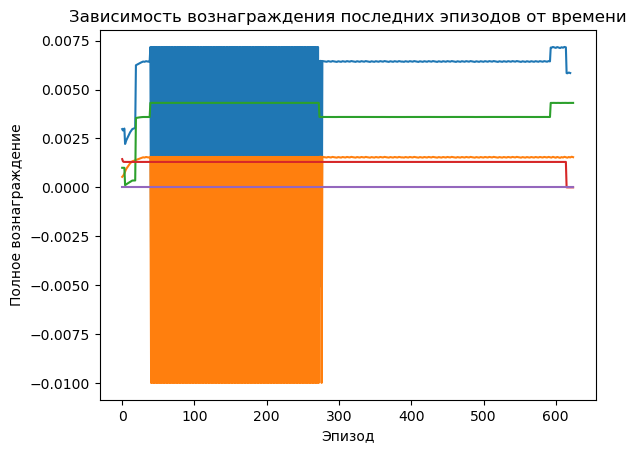

In [4]:
#plt.plot(step_reward[:-5])
plt.plot(angle_step_reward,color='b')
plt.plot(speed_step_reward,color='g')
#plt.plot(view_step_reward)
#plt.plot(stoper_step_reward)
plt.legend(['angle','speed'])
plt.title('Зависимость вознаграждения последних эпизодов от времени')
plt.xlabel('Эпизод')
plt.ylabel('Вознаграждения')
plt.show()

In [5]:
import pygame
import math
import vector 



zero = vector.obj(x=300, y=300)

screen_width = zero.x * 2
screen_height = zero.y * 2
screen = pygame.display.set_mode((screen_width, screen_height))
pygame.display.set_caption("Moving")

black = (0, 0, 0)
white = (255, 255, 255)
red = (255, 0, 0)
green = (0, 255, 0)
blue = (0, 0, 255)




while True:

    screen.fill(black)


    pygame.draw.circle(screen, green, (zero.x, zero.y), 3)

    # рисуем треугольник
    course = math.radians(90)

    triangle = zero
    triangle_width = 10
    triangle_height = 10

    corner2 = vector.obj(x= triangle.x + triangle_width / 2, y= triangle.y + triangle_height) - zero 
    corner3 = vector.obj(x= triangle.x - triangle_width / 2, y= triangle.y + triangle_height) - zero

    corner2 = corner2.rotateZ(course) + zero
    corner3 = corner3.rotateZ(course) + zero

    triangle_points = [(triangle.x, triangle.y), (corner2.x, corner2.y),
                    (corner3.x, corner3.y)]
    
    pygame.draw.polygon(screen, red, triangle_points)

    pygame.draw.circle(screen, blue, (zero.x + 150, zero.y - 90), 10)

    pygame.draw.circle(screen, white, (zero.x - 150, zero.y + 90), 20)

    pygame.display.update()

    # устанавливаем частоту обновления экрана
    pygame.time.Clock().tick(60)

    b_quit = False
    for event in pygame.event.get():
        
        if event.type == pygame.QUIT:
            b_quit = True
        if event.type == pygame.MOUSEBUTTONDOWN: # останавливаем падение звезд по клику
            freeze = True
        if event.type == pygame.KEYDOWN:
            if event.key == pygame.K_ESCAPE:
                b_quit = True
            if event.key == pygame.K_RETURN: # возобновляем движение вниз, если нажат Enter
                freeze = False

    if b_quit == True:
        break

pygame.quit()

In [2]:
pygame.quit()

In [1]:
from PIL import Image, ImageDraw
import numpy as np

black = (0, 0, 0)
white = (255, 255, 255)
red = (255, 0, 0)
green = (0, 255, 0)
blue = (0, 0, 255)
 
# Пустой желтый фон.
im = Image.new('RGB', (600, 600), black)
draw = ImageDraw.Draw(im)
 
draw.rectangle((1, 1, 599, 599), outline=red, width=4)

draw.ellipse((100, 100, 110, 110), fill=blue, outline=blue)
 
draw.polygon(
    xy=(
        (200, 200),
        (300, 100),
        (250, 50)
    ), fill=red, outline=red
)

draw.point((450, 450), fill=green)

inp = np.asarray(im)

im = im.convert('L')

im.save('draw-render.jpg', quality=95)

im_np = np.asarray([im])
im_np = im_np.transpose((1, 2, 0))


In [ ]:
im_np.shape

In [ ]:
im_np

In [ ]:
from env_simple_move import HumanMoveSimpleAction
from stable_baselines3 import SAC
from typing import Any, Dict, Tuple, Union
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.logger import Logger, Video
from moviepy.editor import ImageSequenceClip
import torch
import numpy as np

DQN_path = "../sb3_SAC/"

tmp_path = DQN_path + "model_1"

seed = int( datetime.now(TZ).strftime("%H%M%S") )
env = HumanMoveSimpleAction(render_mode = 'rgb_array', continuous=True, seed=seed)
model = SAC.load(tmp_path, env)

logger = Logger(folder = DQN_path, output_formats=["mp4"])

#Video
screens = []

def grab_screens(_locals: Dict[str, Any], _globals: Dict[str, Any]) -> None:
    """
    Renders the environment in its current state, recording the screen in the captured `screens` list

    :param _locals: A dictionary containing all local variables of the callback's scope
    :param _globals: A dictionary containing all global variables of the callback's scope
    """
    screen = env.render()
    screens.append(screen)

evaluate_policy(
    model,
    env,
    callback=grab_screens,
    n_eval_episodes=1,
    deterministic=True,
)

#logger.record(
#    "video",
#    Video(torch.from_numpy(np.asarray([screens])), fps=30),
#    exclude=("stdout", "log", "json", "csv"),
#)

# Generate a sequence of frames
clip = ImageSequenceClip(screens[:-1], fps=30)
clip.write_videofile('output.mp4')

In [6]:
logger.dump()

In [ ]:
from env_simple_move import HumanMoveSimpleAction
import numpy as np
from stable_baselines3 import DQN
from typing import Any, Dict, Tuple, Union
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.logger import Video
from stable_baselines3.common.logger import KVWriter, Logger
import torch
from stable_baselines3.common.vec_env import VecVideoRecorder, DummyVecEnv

env_id = "MoveSimple"
video_folder = "logs/videos/"
video_length = 30 * 10


DQN_path = "../sb3_DQN/"

tmp_path = DQN_path + "model"

seed = int( datetime.now(TZ).strftime("%H%M%S") )
env = HumanMoveSimpleAction(render_mode = 'rgb_array', continuous=False, seed = seed)
read_model = DQN.load(tmp_path, env)

vec_env = DummyVecEnv([lambda: env])

# Record the video starting at the first step
vec_env = VecVideoRecorder(vec_env, video_folder,
                       record_video_trigger=lambda x: x == 0, video_length=video_length,
                       name_prefix=f"DQN-agent-{env_id}")


observation = vec_env.reset()
t1 = False
t2 = False
t3 = False
for _ in range(video_length + 1):
  action, _ = read_model.predict(observation)
  observation, t1, t2, t3 = vec_env.step(action)
  if t2[0] == True:
    break
# Save the video
vec_env.close()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


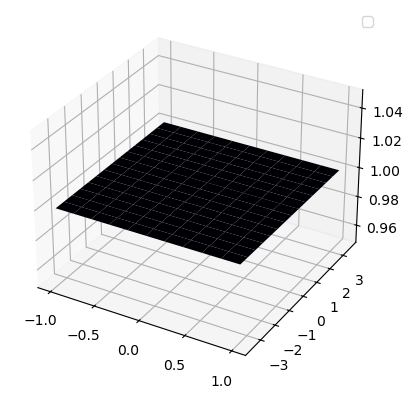

In [20]:
import matplotlib.pyplot as plt
import numpy as np

x_cos = np.outer(np.linspace(-1, 1, 11), np.ones(15))
y_speed = np.outer(np.linspace(-3.5, 3.5, 15), np.ones(11))
y_speed = y_speed.T
z_reward = np.ones([11,15])

for x in range(x_cos.shape[1]):
    for y in range(y_speed.shape[1]):
        cos_view_to_speed = x_cos[x]
        speed_right = y_speed[y]
        koef_rew_view_to_speed = 1.3 - cos_view_to_speed
        d_right_reward = -0.001 if koef_rew_view_to_speed > 0.9 and abs(speed_right) > 0.01 else 0.001
        z_reward[x][y] =  0.001 * koef_rew_view_to_speed + d_right_reward


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_cos, y_speed, z_reward, cmap='inferno')
ax.legend()

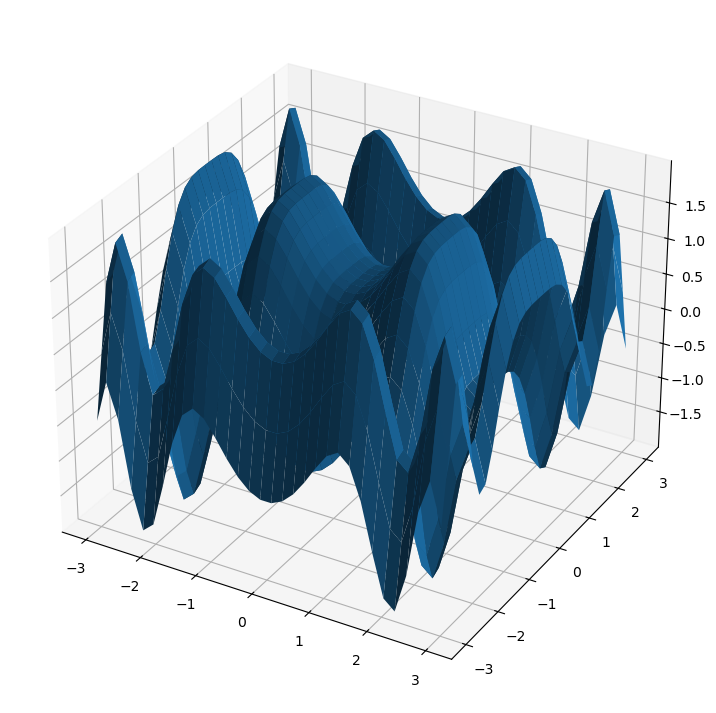

In [3]:
import numpy as np
import matplotlib.pyplot as plt
 
 
# Creating dataset
x = np.outer(np.linspace(-3, 3, 32), np.ones(32))
y = x.copy().T # transpose
z = (np.sin(x **2) + np.cos(y **2) )
 
# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
 
# Creating plot
ax.plot_surface(x, y, z)
 
# show plot
plt.show()